# BeautifulSoup을 사용한 웹 크롤링
- 웹 크롤링 : 웹에 있는 정보 중에서 필요한 데이터를 긁어온다.

- 셀레니엄 : 매크로 같은거

In [1]:
from bs4 import BeautifulSoup

In [2]:
page = open('../data/03. test_first.html','r').read()
soup = BeautifulSoup(page, 'html.parser')
# html.parser 파서 종류 중 하나
#lxml, xml, html5lib
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Simple HTML Title
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First Item
    <a href="https://www.naver.com" id="pw-link">
     Naver
    </a>
   </p>
   <p class="inner-text second-item">
    Second Item
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    This is outer-text
   </b>
  </p>
 </body>
</html>


In [3]:
html = list(soup.children)[2]
body = list(html.children)[3]
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                This is outer-text
            </b>
</p>
</body>

In [4]:
soup.find_all('p') #태그로 찾기
#soup.find('p') #첫번째 <p>만 가져오기

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>, <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 This is outer-text
             </b>
 </p>]

In [25]:
soup.find_all('p', class_='inner-text') #태그와 클래스로 찾기, class_는 생략 가능

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>, <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>]

In [26]:
soup.find_all(id='first')

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>]

In [27]:
#print(list(soup.))
soup.head.next_sibling.next_sibling #siblings에 s붙이면 여러개 불러옴

<body>
<div>
<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                This is outer-text
            </b>
</p>
</body>

In [28]:
soup.head.next_sibling #siblings에 s붙이면 여러개 불러옴

'\n'

In [29]:
soup.body.previous_sibling.previous_sibling

<head>
<title>Simple HTML Title</title>
</head>

In [30]:
body.p

<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>

In [31]:
print(body.p) #naver 가져옴
print(body.p.next_sibling.next_sibling) #python 가져옴

<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>


In [32]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())# each_tag.get_text() : 태그 빼고 텍스트만 긁어오기


                First Item
                Naver


                Second Item
                Python



                Data Science is funny.
            



                This is outer-text
            



In [33]:
body.get_text()

'\n\n\n                First Item\n                Naver\n\n\n                Second Item\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                This is outer-text\n            \n\n'

In [34]:
links = soup.find_all('a')
for link in links:
    href = link['href']
    text = link.string
    print(text + ' >> ' + href)

Naver >> https://www.naver.com
Python >> https://www.python.org


In [36]:
soup.find_all(['a','b'])

[<a href="https://www.naver.com" id="pw-link">Naver</a>,
 <a href="https://www.python.org" id="py-link">Python</a>,
 <b>
                 Data Science is funny.
             </b>,
 <b>
                 This is outer-text
             </b>]

## 네이버 영화 평점 분석
- 네이버 영화 > 영화랭킹 > 평점순(현재상영작) 데이터 사용
- 날짜 변화에 따른 영화 평점 변화 분석

### 개발자 도구로 html 코드 확인하기
- 크롬 기준 F12버튼

In [76]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200115"
page = urlopen(url)
soup =BeautifulSoup(page,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200115" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <meta

In [77]:
##제목 가져오기
soup.find_all('div','tit5')[0].a.string #get_text하면 기호 딸려나옴 a태그 안의 string


'포드 V 페라리'

In [78]:
##포인트 가져오기
soup.find_all('td','point')[0].string #0번째 영화 평점


'9.54'

In [116]:
##날짜 array 만들기
#date_range(언제부터, periods = 몇개, freq = 주기)
date = pd.date_range('2019-12-20',periods=10, freq='d') #d는 day, 1/15까지 넣을거
print(date[0])
print(type(date[0]))
print(type(date))
date

2019-12-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29'],
              dtype='datetime64[ns]', freq='D')

In [277]:
import urllib
# tqdm - 진행상황 progress bar 표시
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

##append는 한개, expend는 list로 여러개 추가가능
# movie_date.append('2010-08-08')
# movie_date.extend(['2010-08-08','2010-08-09','2010-08-10'])

##tqdm으로 퍼센트보기
# for i in tqdm_notebook(range(10)):
#     print(i+1)

# for today in tqdm_notebook(date):
#     print(today)
##날짜 찍어보기

for today in tqdm_notebook(date):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}" #date 값 넣어주기 위해 {}
    html = url.format(date= urllib.parse.quote(today.strftime('%Y%m%d')))
    response = urlopen(html)
    
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point')) #영화 갯수 체크
    
    movie_date.extend([today for n in range(end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(end)])
    
#     print(today.strftime('%Y%m%d')) 
##strftime은 날짜 시간을 string으로 변환(pandas), 소문자 y는 년도를 2글자로 표현
  
## urllib.parse.quote은 파이썬에서 url 조작할 때 사용
## 특수문자 포함된 string을 퍼센트 인코딩    

In [278]:
print(movie_date)
print(movie_name)
print(movie_point)

[Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00', freq='D'), Timestamp('2019-12-20 00:00:00'


['가버나움', '포드 V 페라리', '주전장', '포레스트 검프', '메리 포핀스', '교회오빠', '러브 앳', '슈퍼소닉', '윤희에게', '킹 오브 프리즘', '나이브스 아웃', '킹 오브 프리즘 프라이드 더 히어로', '결혼 이야기', '서칭 포 슈가맨', '러브 액츄얼리', '아이리시맨', '벌새', '7번방의 선물', '부에나 비스타 소셜 클럽', '우리집', '접속', '블랙 스완', '겨울왕국 2', '조커', '터미네이터: 다크 페이트', '쿵푸 허슬', '캐롤', '더 킹: 헨리 5세', '미드나잇 인 파리', '기생충', '블랙머니', '아비정전', '보리밭을 흔드는 바람', '엔젤 해즈 폴른', '레토', '콜드 워', '메기', '미성년', '엑시트', '해피 엔드', '멋진 하루', '시동', '날씨의 아이', '밀양', '신의 한 수: 귀수편', '무뢰한', '아담스 패밀리', '아사코', '감쪽같은 그녀', '더 길티', '가버나움', '포드 V 페라리', '주전장', '포레스트 검프', '교회오빠', '러브 앳', '슈퍼소닉', '킹 오브 프리즘', '킹 오브 프리즘 프라이드 더 히어로', '결혼 이야기', '나이브스 아웃', '윤희에게', '서칭 포 슈가맨', '러브 액츄얼리', '아이리시맨', '벌새', '부에나 비스타 소셜 클럽', '우리집', '접속', '겨울왕국 2', '블랙 스완', '조커', '터미네이터: 다크 페이트', '쿵푸 허슬', '더 킹: 헨리 5세', '미드나잇 인 파리', '기생충', '아비정전', '블랙머니', '보리밭을 흔드는 바람', '레토', '콜드 워', '메기', '미성년', '엑시트', '해피 엔드', '멋진 하루', '시동', '날씨의 아이', '밀양', '신의 한 수: 귀수편', '무뢰한', '아담스 패밀리', '아사코', '감쪽같은 그녀', '더 길티', '카센타', '나를 찾아줘', '라스트 크리스마스', '82년생 김지영', '가버나움', '포드 V 페라리', '포레스트 검프', 

['9.59', '9.56', '9.49', '9.39', '9.27', '9.27', '9.25', '9.21', '9.18', '9.17', '9.12', '9.12', '9.11', '8.99', '8.95', '8.92', '8.90', '8.83', '8.77', '8.71', '8.70', '8.69', '8.69', '8.65', '8.62', '8.62', '8.57', '8.53', '8.53', '8.49', '8.48', '8.47', '8.45', '8.44', '8.40', '8.32', '8.32', '8.31', '8.29', '8.27', '8.17', '7.98', '7.89', '7.87', '7.85', '7.82', '7.80', '7.57', '7.54', '7.51', '9.59', '9.56', '9.49', '9.39', '9.27', '9.25', '9.21', '9.17', '9.12', '9.12', '9.12', '9.11', '8.99', '8.95', '8.93', '8.90', '8.77', '8.71', '8.70', '8.69', '8.69', '8.65', '8.63', '8.62', '8.53', '8.53', '8.49', '8.47', '8.46', '8.45', '8.40', '8.33', '8.32', '8.31', '8.29', '8.27', '8.17', '8.00', '7.89', '7.87', '7.85', '7.82', '7.80', '7.58', '7.55', '7.51', '7.28', '7.07', '6.73', '6.69', '9.59', '9.56', '9.39', '9.27', '9.25', '9.21', '9.17', '9.13', '9.12', '9.12', '9.07', '8.99', '8.95', '8.93', '8.89', '8.77', '8.71', '8.69', '8.69', '8.66', '8.63', '8.62', '8.53', '8.53', '8.49',

In [279]:
movie = pd.DataFrame({'date': movie_date, 'name': movie_name, 'point': movie_point})
movie

,date,name,point
0,2019-12-20,가버나움,9.59
1,2019-12-20,포드 V 페라리,9.56
2,2019-12-20,주전장,9.49
3,2019-12-20,포레스트 검프,9.39
4,2019-12-20,메리 포핀스,9.27
...,...,...,...
456,2019-12-29,대통령의 7시간,6.21
457,2019-12-29,쥬만지: 넥스트 레벨,6.11
458,2019-12-29,백두산,5.93
459,2019-12-29,아내를 죽였다,5.21


In [280]:
import numpy as np

##영화별 점수 합산 보기 = pivoting
##point 숫자로 바꾸기
movie['point'] = pd.to_numeric(movie['point'])

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc = np.sum) #평균은 np.mean
movie_unique = movie_unique.sort_values(by='point', ascending = False)
movie_unique.head()

,point
name,
포드 V 페라리,95.67
교회오빠,92.67
러브 앳,92.65
나이브스 아웃,91.31
결혼 이야기,91.14


In [281]:
tmp = movie.query("name==['기생충', '겨울왕국 2']") #query = 필터링
tmp

,date,name,point
22,2019-12-20,겨울왕국 2,8.69
29,2019-12-20,기생충,8.49
69,2019-12-21,겨울왕국 2,8.69
76,2019-12-21,기생충,8.49
117,2019-12-22,겨울왕국 2,8.69
124,2019-12-22,기생충,8.49
162,2019-12-23,겨울왕국 2,8.70
169,2019-12-23,기생충,8.49
211,2019-12-24,겨울왕국 2,8.70
217,2019-12-24,기생충,8.49


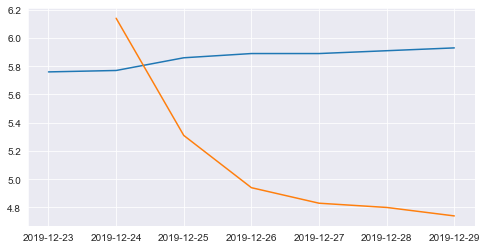

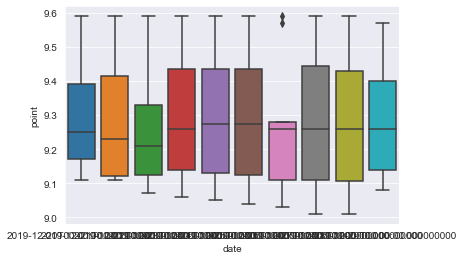

In [282]:
#영화 평점 변화(영화 별)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

changePoint = movie.query("name == ['백두산']")
changePoint2 = movie.query("name == ['캣츠']")

plt.figure(figsize=(8,4))
plt.plot(changePoint['date'], changePoint['point'],changePoint2['date'], changePoint2['point'])
plt.show()

# selected = movie.query('name == ["캣츠","백두산"]')
selected = movie.query('point > 9')
sns.boxplot(x="date", y="point",data=selected)

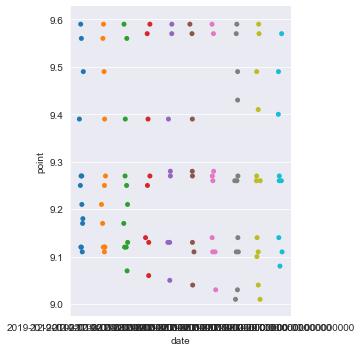

In [283]:
sns.catplot(x="date", y="point",data=selected)

## 영화 날짜 변화에 따른 평점 확인하기

In [284]:
movie_pivot= pd.pivot_table(movie,
                           index='date',
                           columns='name',
                            ## 리스트형태로 []넣으면 columns에 point'라는 인덱스가 추가됨(2개 이상의 인덱스 가능성이 있어서) aggfunc도 []없이 써주는게 깔끔
                           values=['point']) #첨에 리스트로 선언해줬으니깐 걍 []넣었다가 droplevel로 뺴줌

movie_pivot.to_csv('../data/04. movie_pivot_table.csv', 
                       sep=',',
                       encoding='utf-8')
movie_pivot.head()

point                                                   \
name       7번방의 선물 82년생 김지영  가버나움 감쪽같은 그녀 겨울왕국 2 결혼 이야기  교회오빠   기생충   
date                                                                  
2019-12-20    8.83      NaN  9.59    7.54   8.69   9.11  9.27  8.49   
2019-12-21     NaN     6.69  9.59    7.55   8.69   9.12  9.27  8.49   
2019-12-22     NaN     6.69  9.59    7.54   8.69   9.13  9.27  8.49   
2019-12-23     NaN     6.69  9.59    7.54   8.70   9.14  9.27  8.49   
2019-12-24     NaN     6.69  9.59    7.55   8.70   9.13  9.27  8.49   

                               ...                             \
name       나, 다니엘 블레이크 나를 찾아줘  ...    캣츠  콜드 워 쿵푸 허슬 킹 오브 프리즘   
date                           ...                              
2019-12-20         NaN    NaN  ...   NaN  8.32  8.62     9.17   
2019-12-21         NaN   7.07  ...   NaN  8.33  8.62     9.17   
2019-12-22         NaN   7.07  ...   NaN  8.33  8.62     9.17   
2019-12-23         NaN   7.06  ...   NaN  8.33  8.62      NaN   
2019-12-24         NaN   7.06  ...  6.14  8.32  8.62      NaN   

                                                                     \
name       킹 오브 프리즘 프라이드 더 히어로 터미네이터: 다크 페이트 포드 V 페라리 포레스트 검프 해피 엔드   
date                                                                  
2019-12-20                9.12          8.62     9.56    9.39  8.27   
2019-12-21                9.12          8.63     9.56    9.39  8.27   
2019-12-22                9.12          8.63     9.56    9.39  8.27   
2019-12-23                 NaN          8.63     9.57    9.39  8.27   
2019-12-24                 NaN           NaN     9.57    9.39   NaN   

                        
name       행동하는 양심 김대중  
date                    
2019-12-20         NaN  
2019-12-21         NaN  
2019-12-22         NaN  
2019-12-23        2.98  
2019-12-24        2.96  

[5 rows x 71 columns]

In [285]:
##'point'라는 인덱스가 추가된거 확인
for i in range(0,5):
    print(movie_pivot.columns[i])

('point', '7번방의 선물')
('point', '82년생 김지영')
('point', '가버나움')
('point', '감쪽같은 그녀')
('point', '겨울왕국 2')


In [286]:
## 리스트형태로 []넣으면 columns에 point'라는 인덱스가 추가된거 빼고 확인!
movie_pivot.columns = movie_pivot.columns.droplevel()
print(movie_pivot.columns)

Index(['7번방의 선물', '82년생 김지영', '가버나움', '감쪽같은 그녀', '겨울왕국 2', '결혼 이야기', '교회오빠',
       '기생충', '나, 다니엘 블레이크', '나를 찾아줘', '나이브스 아웃', '날씨의 아이', '눈의 여왕4',
       '대통령의 7시간', '더 길티', '더 킹: 헨리 5세', '더 포리너', '라스트 크리스마스', '러브 액츄얼리',
       '러브 앳', '러브레터', '레토', '멀홀랜드 드라이브', '멋진 하루', '메기', '메리 포핀스', '무뢰한',
       '미드나잇 인 파리', '미드소마', '미성년', '밀양', '백두산', '벌새', '보리밭을 흔드는 바람',
       '부에나 비스타 소셜 클럽', '블랙 스완', '블랙머니', '삽질', '서칭 포 슈가맨', '슈퍼소닉', '시동',
       '신비아파트 극장판 하늘도깨비 대 요르문간드', '신의 한 수: 귀수편', '아내를 죽였다', '아담스 패밀리', '아비정전',
       '아사코', '아이리시맨', '엑시트', '엔젤 해즈 폴른', '우리집', '윤희에게', '인비저블 게스트', '일일시호일',
       '접속', '조커', '주전장', '쥬만지: 넥스트 레벨', '천문: 하늘에 묻는다', '카센타', '캐롤', '캣츠',
       '콜드 워', '쿵푸 허슬', '킹 오브 프리즘', '킹 오브 프리즘 프라이드 더 히어로', '터미네이터: 다크 페이트',
       '포드 V 페라리', '포레스트 검프', '해피 엔드', '행동하는 양심 김대중'],
      dtype='object', name='name')


In [287]:
'백두산' in movie_pivot

True

In [293]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

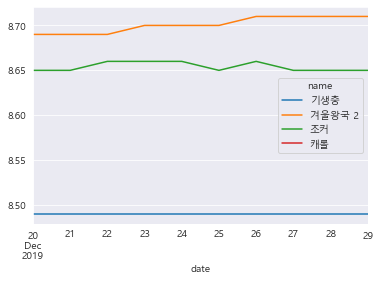

In [294]:
movie_pivot.plot(y=['기생충',
                    '겨울왕국 2',
                    '조커',
                    '캐롤'])
plt.show()